Oh hi!


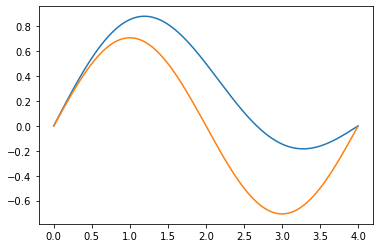

In [4]:
from wpspec import pib
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

params = {'box_length': 4, 'grid_points': 500,'system': 'pib'}

pi = pib(params)


pi.dt = 0.1

pi.Psi = np.sqrt(1/2) * pi.eigenfunction(1) + np.sqrt(1/2) * pi.eigenfunction(2)

pi.expand_pib()
plt.plot(pi.x, pi.Psi)
plt.plot(pi.x, pi.phi[:,1])



In [5]:

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.close()


### parameters for plot
ax.set_xlim((0, pi.L))
ax.set_ylim((-0.8, 0.8))

line, = ax.plot([], [], lw=2)
#line1, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    #line1.set_data([], [])
    return (line,)

In [6]:
N_time = 100

# animation function. This is called sequentially  
def animate(i):
    pi.time_factor(i)
    pi.expand_wavefunction_t()
    line.set_data(pi.x, pi.Psi)
    return (line,)
  
anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=N_time, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
